In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

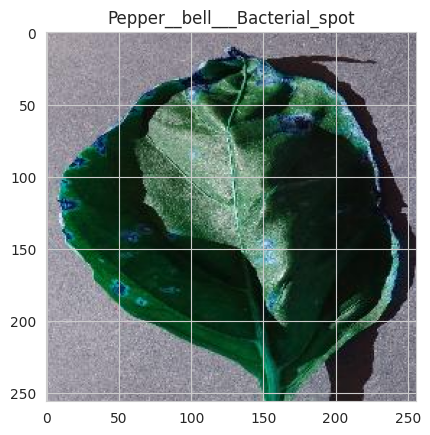

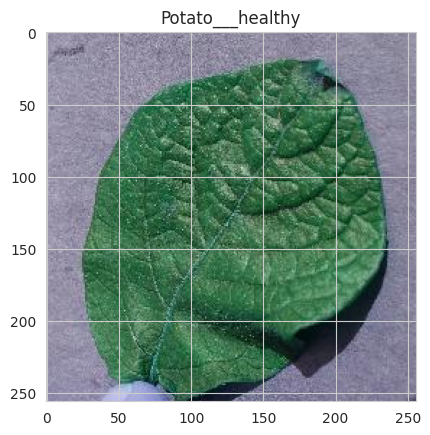

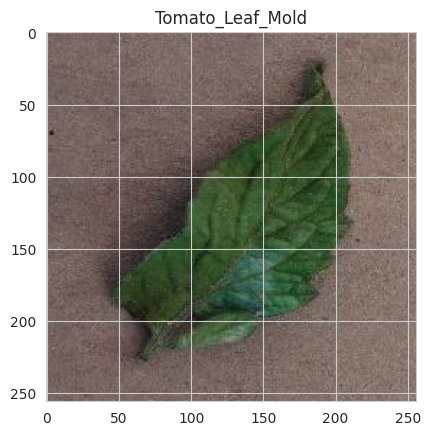

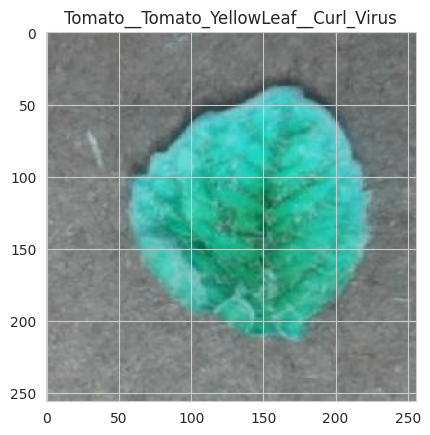

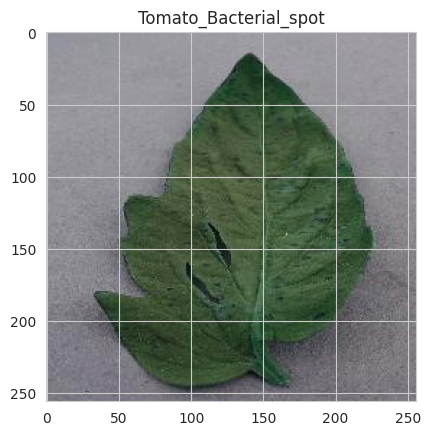

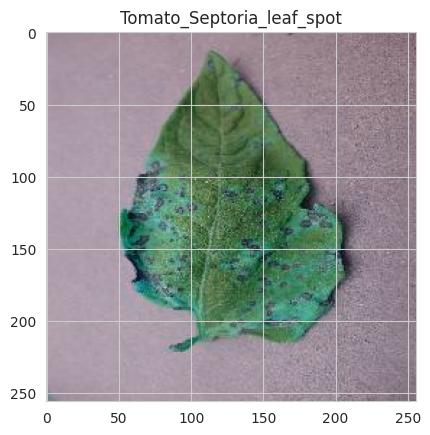

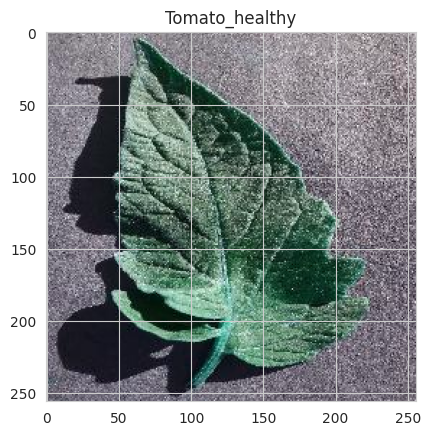

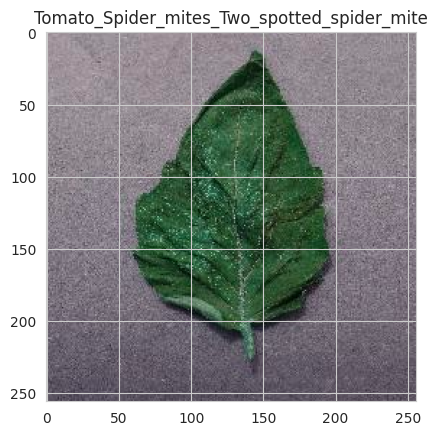

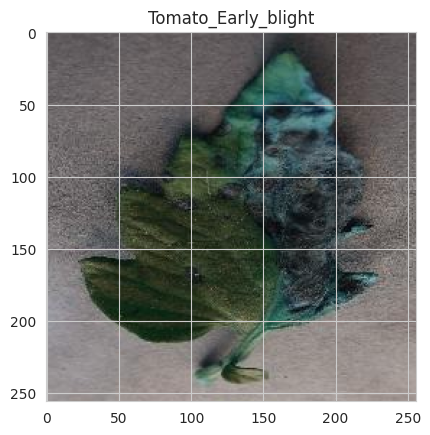

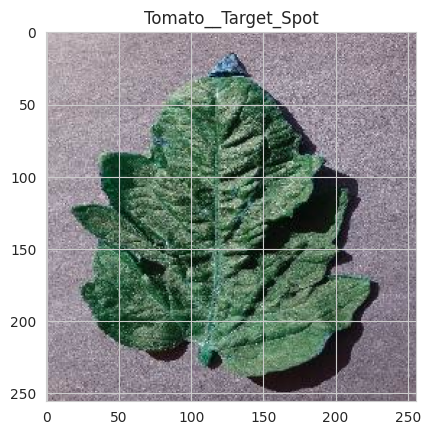

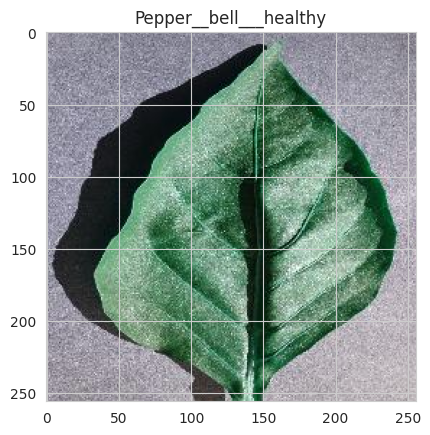

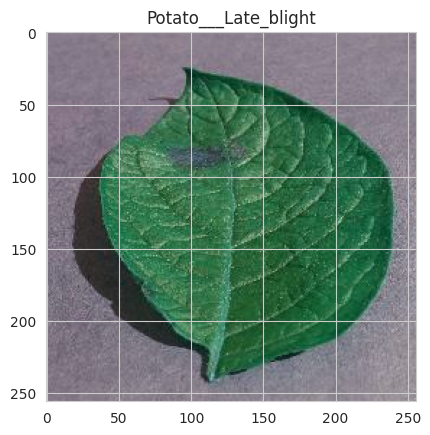

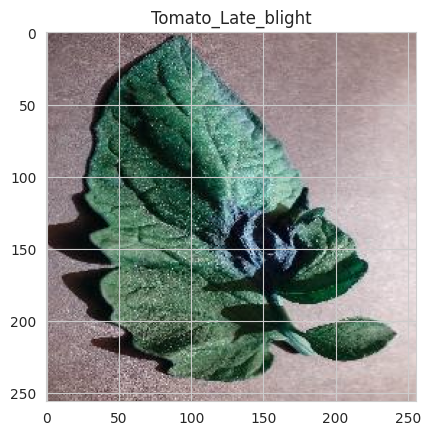

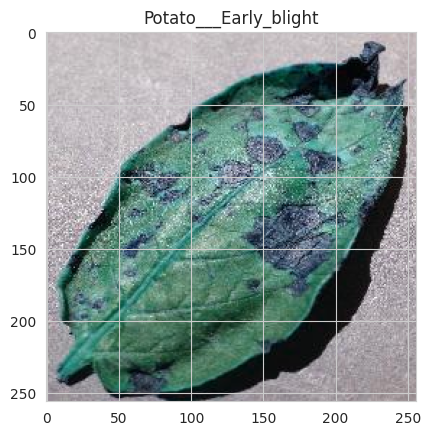

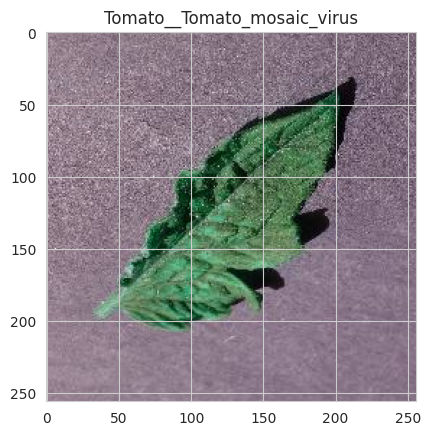

In [10]:
DATA_PATH = '../input/plantdisease/PlantVillage'

for cat in os.listdir(DATA_PATH):
    path = os.path.join(DATA_PATH, cat)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
        plt.imshow(image)
        plt.title(f'{cat}')
        plt.show()
        break

In [11]:
IMG_SHAPE = (224, 224)
INPUT_SHAPE = [224, 224, 3]
EPOCHS = 50
BS = 32
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2, validation_split=0.25)

train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='training', 
                                                  class_mode='categorical', shuffle=True) 

val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='validation', 
                                                  class_mode='categorical', shuffle=True)

Found 15482 images belonging to 15 classes.
Found 5156 images belonging to 15 classes.


In [12]:
label = train_data_gen.class_indices
label

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

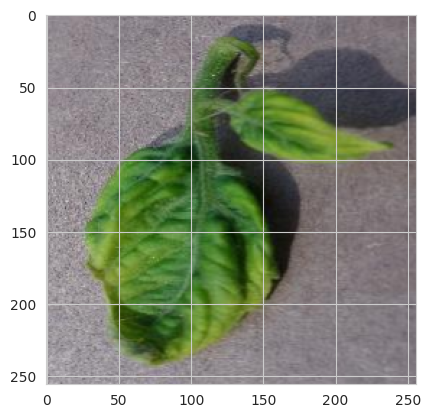

In [13]:
img = train_data_gen.__getitem__(11)[0]
plt.imshow(img[0])
#plt.title(label[11])

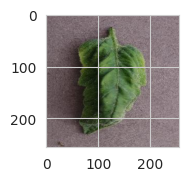

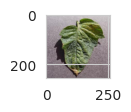

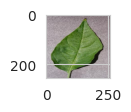

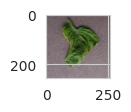

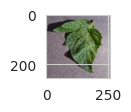

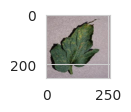

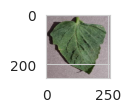

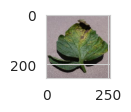

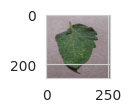

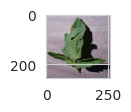

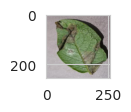

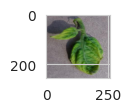

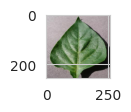

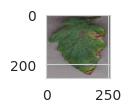

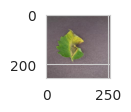

In [14]:
plt.figure(figsize=(16,10))
for i in range(15):
    plt.subplot(5, 3, i+1)
    img = train_data_gen.__getitem__(i)[0]
    plt.imshow(img[0])
    plt.xticks()
    plt.show()

In [17]:
def model_building(model_name, INPUT_SHAPE=INPUT_SHAPE):
    print('Model Initialization started')
    base_model = model_name(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
    
    for layers in base_model.layers:
        layers.trainable = False
    print('Model Initialization finished')
    
    #model creation
    print('Model creation started')
    inp_model = base_model.output
    
    x = GlobalAveragePooling2D()(inp_model)
    x = Dense(128, activation = 'relu')(x)
    x = Dense(15, activation = 'sigmoid')(x)
    
    model = Model(inputs = base_model.input, outputs = x)
    
    #model summary
    print('Model summary')
    #model.summary()
    
    #model compilation
    model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'categorical_crossentropy')
    
    history = model.fit(train_data_gen, validation_data=val_data_gen, 
                       validation_steps=len(val_data_gen)//BS,
                       steps_per_epoch=len(train_data_gen)//BS,
                       batch_size=BS, 
                       epochs=EPOCHS)
    
    print('Model Building Finished')
    
    !mkdir -p saved_model
    model.save(f'saved_model/{model_name}_1.h5')
    print('Model was saved')
    
    return history

In [18]:
def evaluation_plot(model):
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(10, 8))
    plt.plot(model['loss'], label = 'loss')
    plt.plot(model['accuracy'], label = 'accuracy')
    plt.plot(model['val_loss'], label = 'val_loss')
    plt.plot(model['val_accuracy'], label = 'val_accuracy')
    plt.legend()
    plt.title('Model Evaluation')
    plt.show()

**VGG16 model**

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

In [20]:
vgg16_hist = model_building(VGG16)

Model Initialization started
58889256/58889256 [==============================] - 3s 0us/step
Model Initialization finished
Model creation started
Model summary
Epoch 1/50
15/15 [==============================] - 14s 662ms/step - loss: 2.5674 - accuracy: 0.1896 - val_loss: 2.5041 - val_accuracy: 0.2625
Epoch 2/50
15/15 [==============================] - 10s 698ms/step - loss: 2.4041 - accuracy: 0.2792 - val_loss: 2.3477 - val_accuracy: 0.2125
Epoch 3/50
15/15 [==============================] - 10s 697ms/step - loss: 2.2263 - accuracy: 0.2937 - val_loss: 2.1019 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 10s 683ms/step - loss: 2.1757 - accuracy: 0.4146 - val_loss: 2.1196 - val_accuracy: 0.3313
Epoch 5/50
15/15 [==============================] - 11s 721ms/step - loss: 2.0050 - accuracy: 0.4156 - val_loss: 1.9860 - val_accuracy: 0.4563
Epoch 6/50
15/15 [==============================] - 10s 683ms/step - loss: 1.9406 - accuracy: 0.4271 - val_loss: 1.9364 - va

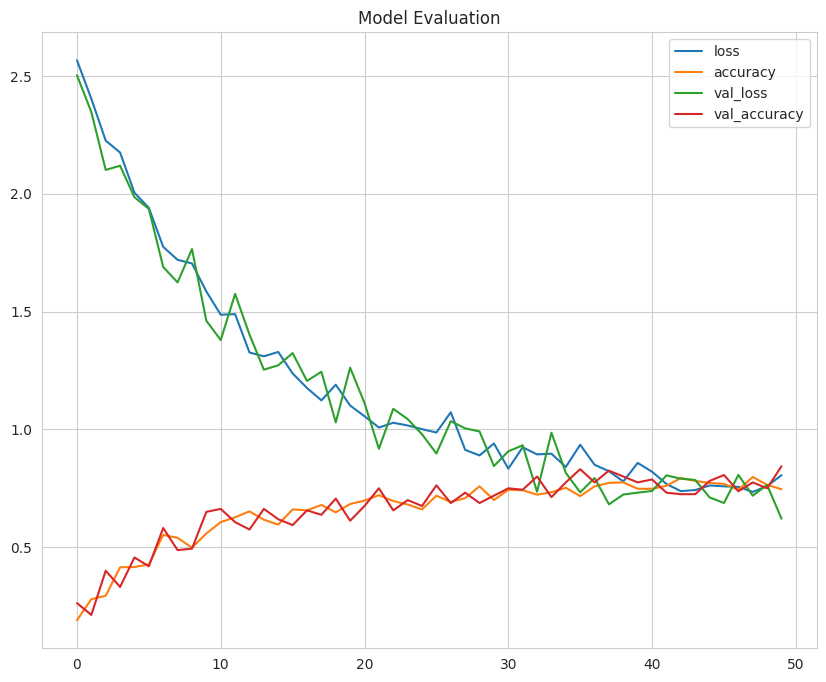

In [21]:
evaluation_plot(vgg16_hist.history)

**InceptionV3 model**

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [23]:
inc_history = model_building(InceptionV3)

Model Initialization started
87910968/87910968 [==============================] - 4s 0us/step
Model Initialization finished
Model creation started
Model summary
Epoch 1/50
15/15 [==============================] - 16s 723ms/step - loss: 2.4546 - accuracy: 0.2229 - val_loss: 2.0601 - val_accuracy: 0.3750
Epoch 2/50
15/15 [==============================] - 10s 663ms/step - loss: 1.8611 - accuracy: 0.4250 - val_loss: 1.7488 - val_accuracy: 0.4250
Epoch 3/50
15/15 [==============================] - 10s 657ms/step - loss: 1.6116 - accuracy: 0.5271 - val_loss: 1.3987 - val_accuracy: 0.5312
Epoch 4/50
15/15 [==============================] - 10s 655ms/step - loss: 1.3693 - accuracy: 0.5771 - val_loss: 1.4240 - val_accuracy: 0.5750
Epoch 5/50
15/15 [==============================] - 9s 635ms/step - loss: 1.1986 - accuracy: 0.6229 - val_loss: 1.1571 - val_accuracy: 0.6187
Epoch 6/50
15/15 [==============================] - 9s 639ms/step - loss: 1.1880 - accuracy: 0.6125 - val_loss: 1.1038 - val_

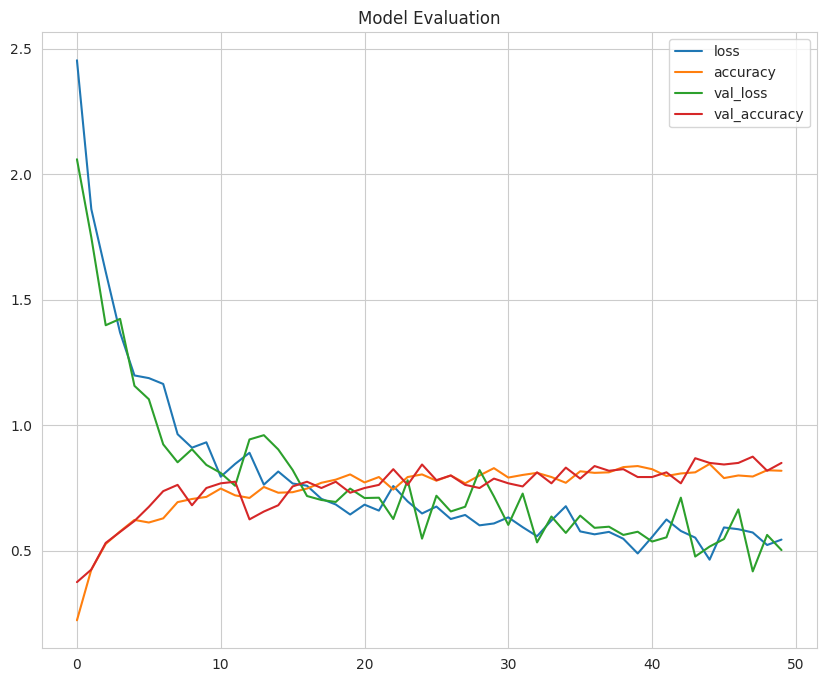

In [24]:
evaluation_plot(inc_history.history)

**Custom CNN model**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set the path to your dataset
DATA_PATH = '../input/plantdisease/PlantVillage'

In [3]:
# Define image dimensions and other parameters
IMG_SHAPE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
EPOCHS = 50
BS = 32

In [4]:
# Create data generators
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True,
                                  vertical_flip=True, shear_range=0.2, validation_split=0.25)

train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='training',
                                                  class_mode='categorical', shuffle=True,
                                                  target_size=IMG_SHAPE)

val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='validation',
                                                class_mode='categorical', shuffle=True,
                                                target_size=IMG_SHAPE)

Found 15482 images belonging to 15 classes.
Found 5156 images belonging to 15 classes.


In [5]:
# Define and compile the custom CNN model
def custom_cnn_model(input_shape=INPUT_SHAPE):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Train the custom CNN model
custom_model = custom_cnn_model()
custom_history = custom_model.fit(train_data_gen, validation_data=val_data_gen,
                                  validation_steps=len(val_data_gen)//BS,
                                  steps_per_epoch=len(train_data_gen)//BS,
                                  batch_size=BS, epochs=EPOCHS)

Epoch 1/50
15/15 [==============================] - 20s 767ms/step - loss: 3.0831 - accuracy: 0.0979 - val_loss: 2.6111 - val_accuracy: 0.1000
Epoch 2/50
15/15 [==============================] - 12s 783ms/step - loss: 2.6459 - accuracy: 0.1083 - val_loss: 2.6246 - val_accuracy: 0.1625
Epoch 3/50
15/15 [==============================] - 11s 747ms/step - loss: 2.6469 - accuracy: 0.1104 - val_loss: 2.5676 - val_accuracy: 0.1125
Epoch 4/50
15/15 [==============================] - 13s 884ms/step - loss: 2.5958 - accuracy: 0.1542 - val_loss: 2.4928 - val_accuracy: 0.2125
Epoch 5/50
15/15 [==============================] - 11s 738ms/step - loss: 2.3982 - accuracy: 0.2188 - val_loss: 2.2037 - val_accuracy: 0.2750
Epoch 6/50
15/15 [==============================] - 11s 750ms/step - loss: 2.4061 - accuracy: 0.2521 - val_loss: 2.2416 - val_accuracy: 0.3562
Epoch 7/50
15/15 [==============================] - 10s 702ms/step - loss: 2.2812 - accuracy: 0.2729 - val_loss: 2.1194 - val_accuracy: 0.3500

In [8]:
# Save the trained model
model_save_path = 'saved_model/custom_cnn_model.h5'
custom_model.save(model_save_path)
print(f"Custom CNN model saved at: {model_save_path}")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Custom CNN model saved at: saved_model/custom_cnn_model.h5


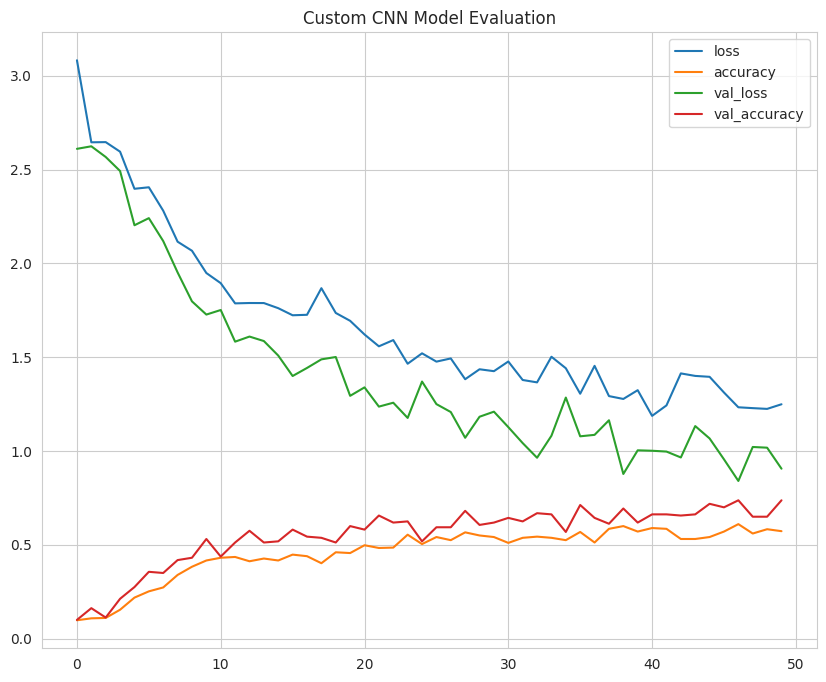

In [7]:
# Plot the evaluation metrics
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.plot(custom_history.history['loss'], label='loss')
plt.plot(custom_history.history['accuracy'], label='accuracy')
plt.plot(custom_history.history['val_loss'], label='val_loss')
plt.plot(custom_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Custom CNN Model Evaluation')
plt.show()

**Evaluation**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

In [32]:
# Load VGG16 model
vgg16_model = load_model('/kaggle/working/saved_model/<function VGG16 at 0x7e0346c37f40>_1.h5')  # Update with the correct path

# Load InceptionV3 model
inception_model = load_model('/kaggle/working/saved_model/<function InceptionV3 at 0x7e0346c34c10>_1.h5')  # Update with the correct path

# Load Custom CNN model
custom_model = load_model('/kaggle/working/saved_model/custom_cnn_model.h5')  # Update with the correct path

In [33]:
def evaluate_model(model, data_gen):
    # Generate predictions
    predictions = model.predict(data_gen)
    y_pred = np.argmax(predictions, axis=1)
    y_true = data_gen.classes

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # F1 Score, Precision, Recall
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=data_gen.class_indices.keys(),
                yticklabels=data_gen.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

162/162 [==============================] - 73s 452ms/step - loss: 37.0300 - accuracy: 0.7915
Evaluation on VGG16 model:
Loss: 37.0300
Accuracy: 0.7915
162/162 [==============================] - 67s 413ms/step
Accuracy: 0.0844
F1 Score: 0.0837
Precision: 0.0841
Recall: 0.0844


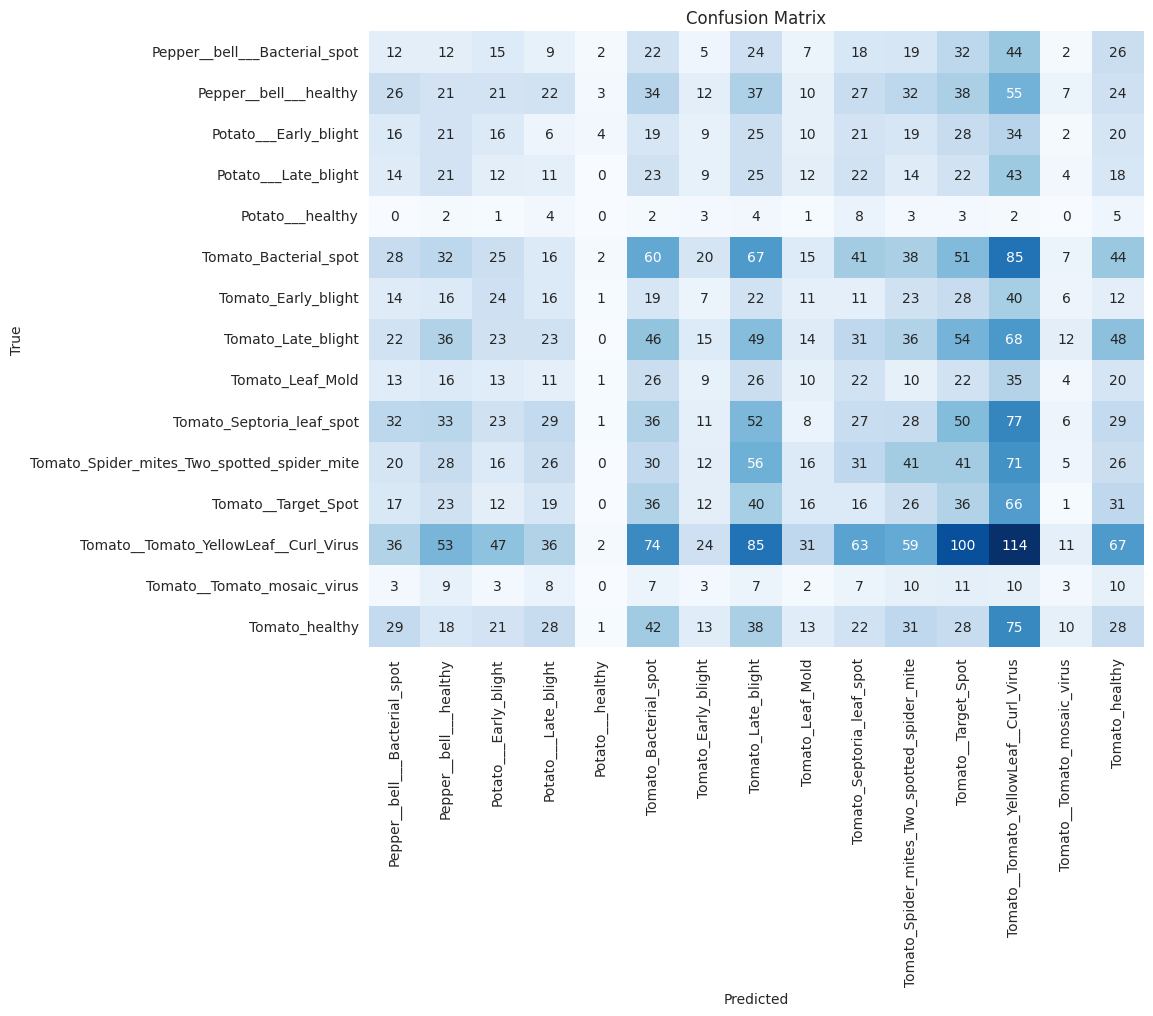

In [34]:
# Evaluate VGG16
vgg16_eval = vgg16_model.evaluate(val_data_gen)
print("Evaluation on VGG16 model:")
print(f"Loss: {vgg16_eval[0]:.4f}")
print(f"Accuracy: {vgg16_eval[1]:.4f}")

evaluate_model(vgg16_model, val_data_gen)

162/162 [==============================] - 72s 434ms/step - loss: 0.5612 - accuracy: 0.8161

Evaluation on InceptionV3 model:
Loss: 0.5612
Accuracy: 0.8161
162/162 [==============================] - 68s 415ms/step
Accuracy: 0.0820
F1 Score: 0.0801
Precision: 0.0792
Recall: 0.0820


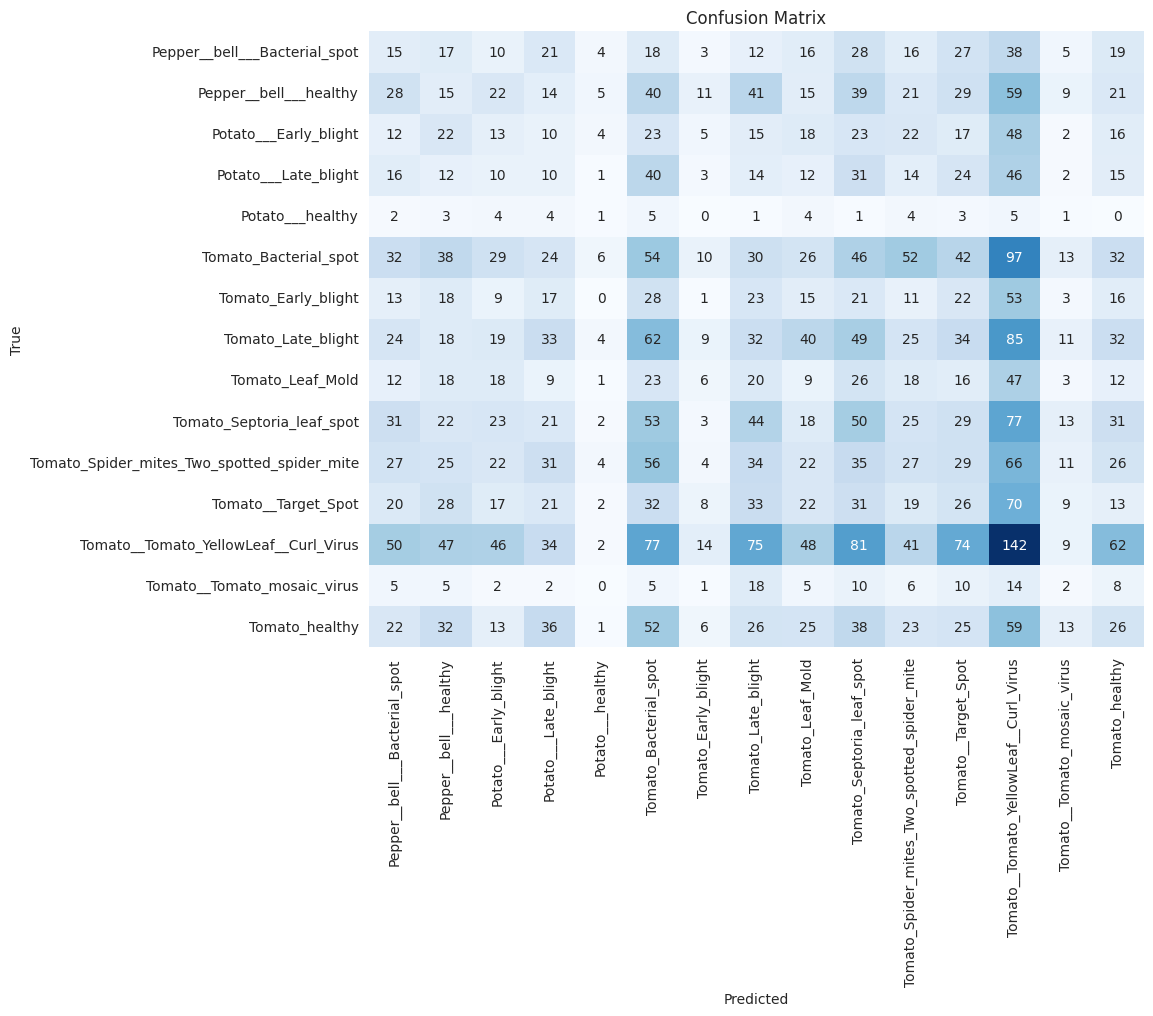

In [35]:
# Evaluate InceptionV3
inc_eval = inception_model.evaluate(val_data_gen)
print("\nEvaluation on InceptionV3 model:")
print(f"Loss: {inc_eval[0]:.4f}")
print(f"Accuracy: {inc_eval[1]:.4f}")

evaluate_model(inception_model, val_data_gen)

In [1]:
# Evaluate Custom CNN
# custom_eval = custom_model.evaluate(val_data_gen)
print("\nEvaluation on Custom CNN model:")
print(f"Loss: {custom_history.history['loss']:.4f}")
print(f"Accuracy: {custom_history.history['accuracy']:.4f}")

# evaluate_model(custom_model, val_data_gen)


Evaluation on Custom CNN model:


NameError: name 'custom_history' is not defined